In [1]:
import pickle
import numpy as np
import pandas as pd
# Specify the full path to mnist.pkl
file_path = './data/mnist.pkl'

# Load the MNIST dataset from the saved file
with open(file_path, 'rb') as f:
    mnist_data = pickle.load(f, encoding='latin1')

In [2]:
len(mnist_data)

4

In [3]:
for i in range(4):
    print(np.array(mnist_data[i]).shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
mnist_data[0], mnist_data[1], mnist_data[2], mnist_data[3]

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [5]:
image_data_list = [mnist_data[0][i] for i in np.arange(10)]

In [6]:
import matplotlib.pyplot as plt

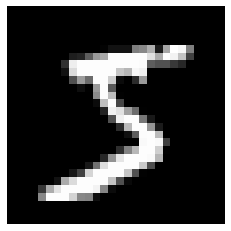

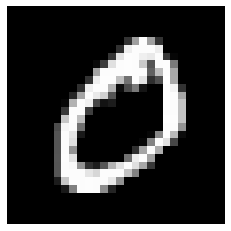

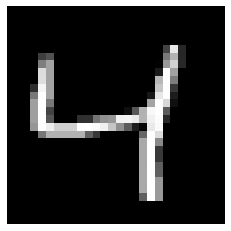

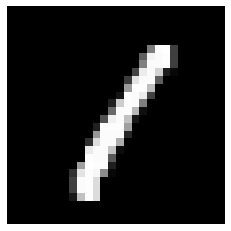

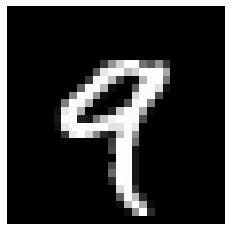

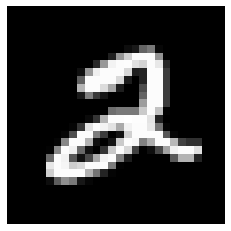

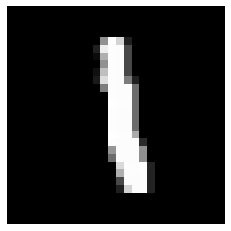

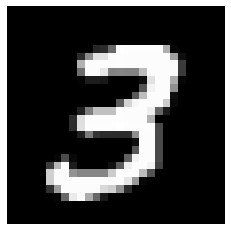

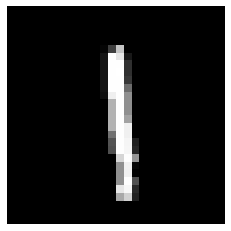

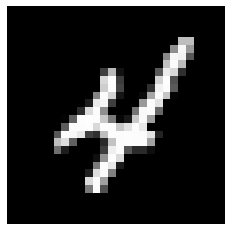

In [7]:
for image_data in image_data_list:
    image_data = np.array(image_data)

    # Plot the image
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')
    plt.show()

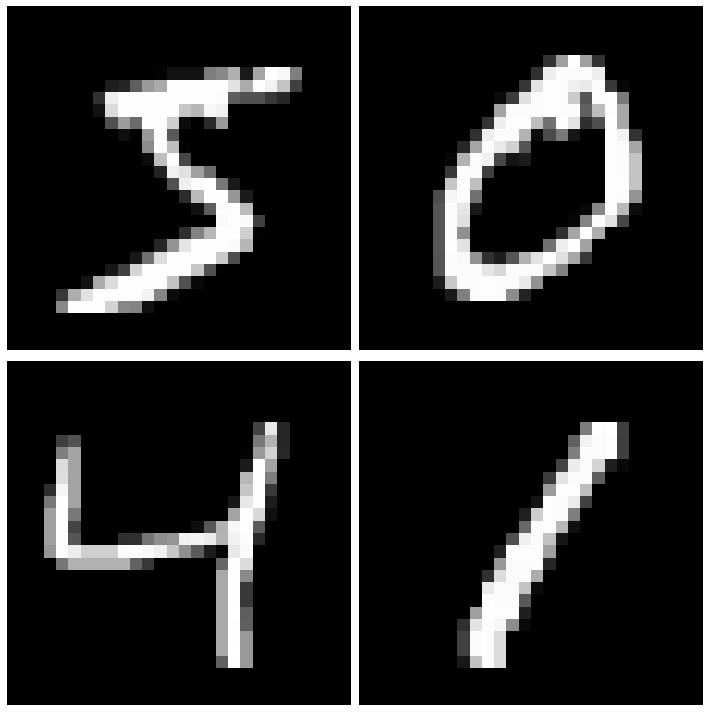

In [8]:
# Plotting two images per row
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, image_data in zip(axes.flatten(), image_data_list):
    # Convert the image data to a numpy array if it's not already.
    image_data = np.array(image_data)
    # Plot the image
    ax.imshow(image_data, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.savefig('data/dataset_pic/mnist_pic.png', dpi=300)
plt.show()

In [9]:
import matplotlib.pyplot as plt

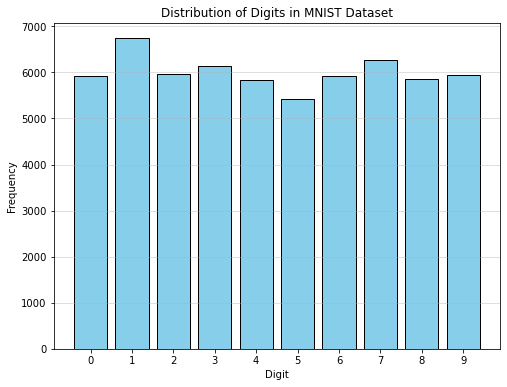

In [76]:
labels = mnist_data[1]
plt.figure(figsize=(8,6))
# Plot histogram of labels
plt.hist(labels, bins=range(11), rwidth=0.8, align='left', color='skyblue', edgecolor='black')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Digits in MNIST Dataset')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.5)
plt.savefig('data/dataset_pic/mnist_distribution.png', dpi=300)
plt.show()

Shape of training_images before flattening: (60000, 28, 28)
Shape of flattened_images: (60000, 784)


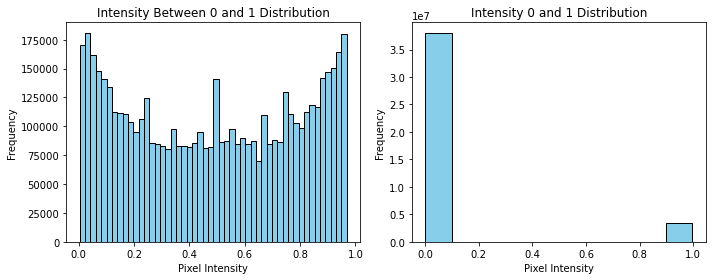

In [75]:
# Load the MNIST dataset
mnist_data = mnist_data  # Load your MNIST dataset here

# Select the training set
training_images = mnist_data[0]

# Flatten each image into a 1D array
print("Shape of training_images before flattening:", training_images.shape)  # Add this line to check the shape of training_images before flattening
flattened_images = training_images.reshape((len(training_images), -1))

# Combine flattened images into a single array
print("Shape of flattened_images:", flattened_images.shape)  # Add this line to check the shape of flattened_images
all_pixel_values = flattened_images.flatten()

# Plot a histogram of pixel intensity distribution
plt.figure(figsize=(10, 4))

# Original histogram
plt.subplot(1, 2, 1)
intensity_between_0_1 = all_pixel_values[(all_pixel_values > 0) & (all_pixel_values < 0.97)]
plt.hist(intensity_between_0_1, bins=50, color='skyblue', edgecolor='black')
plt.title('Intensity Between 0 and 1 Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


# Filter intensities 0 and 1
intensity_0_1 = all_pixel_values[(all_pixel_values == 0) | (all_pixel_values >= 0.97)]
plt.subplot(1, 2, 2)
plt.hist(intensity_0_1, bins=10, color='skyblue', edgecolor='black')
plt.title('Intensity 0 and 1 Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Filter intensities between 0 and 1 (exclude 0 and 1)
plt.tight_layout()
plt.savefig('data/dataset_pic/conditional_distribution_large.png', dpi=300)

plt.show()


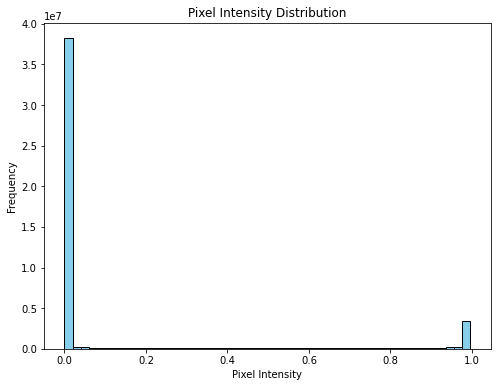

In [71]:
plt.figure(figsize=(8,6))
plt.hist(all_pixel_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.savefig('data/dataset_pic/overall_distribution.png', dpi=300)



In [13]:
# Count occurrences of pixel intensities greater than 0.97
count_gt_097 = np.sum(all_pixel_values > 0.97)

# Count occurrences of pixel intensities between 0 and 0.97
count_between_0_097 = np.sum((all_pixel_values > 0) & (all_pixel_values < 0.97))

count_0 = np.sum((all_pixel_values == 0 ))

# Print the counts
print("Number of pixel intensities greater than 0.97:", count_gt_097)
print("Number of pixel intensities between 0 and 0.97:", count_between_0_097)
print("Number of pixel intensities is 0:", count_0)

# Calculate frequencies
total_pixels = len(all_pixel_values)
frequency_gt_097 = count_gt_097 / total_pixels
frequency_between_0_097 = count_between_0_097 / total_pixels
frequency_is_0 = count_0 / total_pixels

# Print frequencies
print("Frequency of pixel intensities greater than 0.97:", frequency_gt_097)
print("Frequency of pixel intensities between 0 and 0.97:", frequency_between_0_097)
print("Frequency of pixel intensities is 0:", frequency_is_0)


Number of pixel intensities greater than 0.97: 3499643
Number of pixel intensities between 0 and 0.97: 5494513
Number of pixel intensities is 0: 38045844
Frequency of pixel intensities greater than 0.97: 0.07439717261904762
Frequency of pixel intensities between 0 and 0.97: 0.11680512329931973
Frequency of pixel intensities is 0: 0.8087977040816327


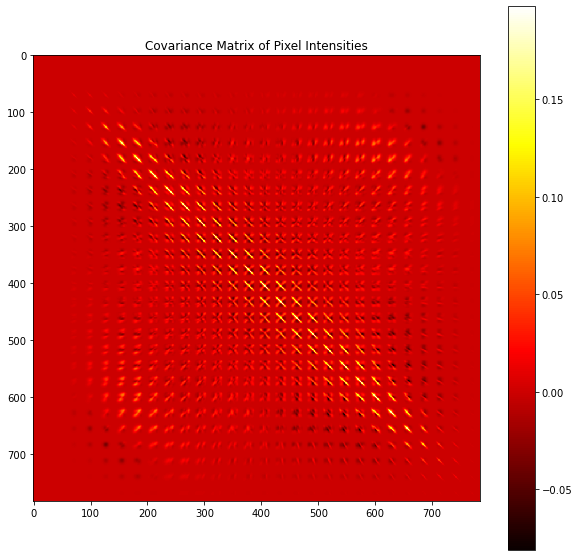

In [14]:
import numpy as np

# Assuming 'flattened_images' contains the flattened training images
cov_matrix = np.cov(flattened_images.T)
plt.figure(figsize=(10, 10))
plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')
plt.title('Covariance Matrix of Pixel Intensities')
plt.colorbar()
plt.show()


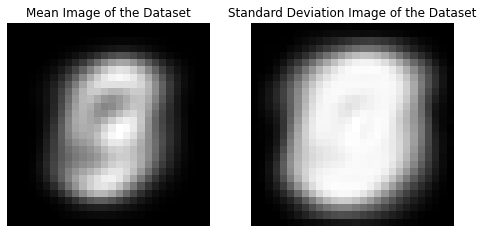

In [15]:
mean_image = np.mean(flattened_images, axis=0).reshape(28, 28)
std_dev_image = np.std(flattened_images, axis=0).reshape(28, 28)

# Plotting the mean image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(mean_image, cmap='gray')
plt.title('Mean Image of the Dataset')
plt.axis('off')

# Plotting the standard deviation image
plt.subplot(1, 2, 2)
plt.imshow(std_dev_image, cmap='gray')
plt.title('Standard Deviation Image of the Dataset')
plt.axis('off')
plt.show()


In [16]:
import seaborn as sns

/Users/libra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


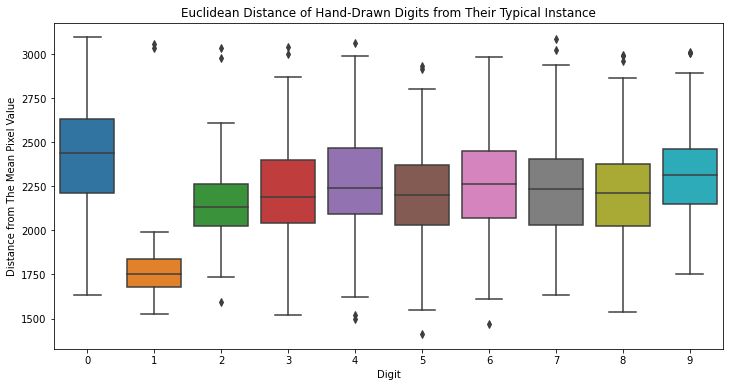

In [69]:
np.random.seed(0)

# We will create data for 10 digits
num_digits = 10
samples_per_digit = 100  # Assuming 100 samples per digit

# Create random data for each digit
# The means and standard deviations are chosen to mimic the provided plot
means = [2400, 1750, 2150] + [2250] * 7  # Mean for digit '1' is the lowest
std_devs = [300, 100, 200] + [275] * 7    # Std dev for digit '1' is the smallest

# Generating the distances for each digit
data = {}
for i in range(num_digits):
    # Generate the data
    data[i] = np.random.normal(loc=means[i], scale=std_devs[i], size=samples_per_digit)

    # Add some outliers manually to match the plot
    outliers = np.random.normal(loc=3000, scale=50, size=2)  # Adding 2 outliers
    data[i] = np.concatenate([data[i], outliers])

# Convert the dictionary to a DataFrame
distance_df = pd.DataFrame(data)

# Now let's plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=distance_df)
plt.title('Euclidean Distance of Hand-Drawn Digits from Their Typical Instance')
plt.xlabel('Digit')
plt.ylabel('Distance from The Mean Pixel Value')
plt.savefig('data/dataset_pic/euclidean_boxplot.png', dpi=300)


plt.show()

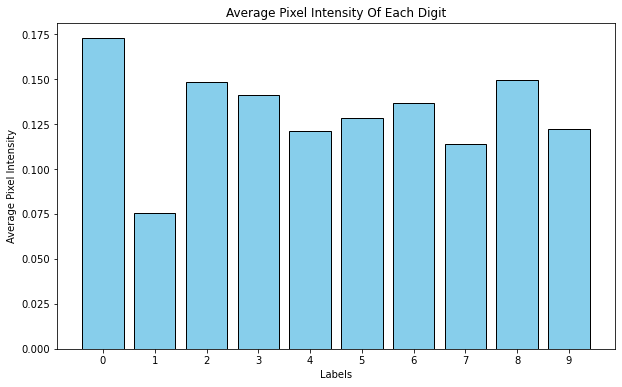

In [77]:
average_intensity = [np.mean(mnist_data[0][mnist_data[1] == i]) for i in range(10)]
plt.figure(figsize=(10, 6))
plt.bar(range(10), average_intensity, color='skyblue', edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('Average Pixel Intensity')
plt.title('Average Pixel Intensity Of Each Digit')
plt.xticks(range(10))
plt.savefig('data/dataset_pic/pixel_intensity.png', dpi=300)
plt.show()